# 講談社「Pythonではじめるベイズ機械学習入門」第4章 潜在変数モデル

## 4.1 混合ガウスモデル

In [9]:
using Distributions
using Plots
using Turing
using LinearAlgebra

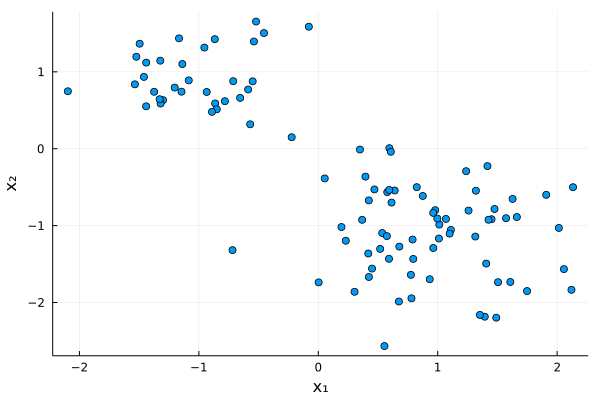

In [10]:
μ₁ = [
    -1.0
    1.0
]

Σ₁ = [
    0.2 0.0
    0.0 0.2
]

μ₂ = [
    1.0
    -1.0
]

Σ₂ = [
    0.4 0.0
    0.0 0.4
]

p = 0.3

N = 100

X = Array{Float64}(undef, 2, N)
S = Array{Bool}(undef, N)

for i in 1:N
    S[i] = rand(Bernoulli(p))
    (μ, Σ) = S[i] == 1 ? (μ₁, Σ₁) : (μ₂, Σ₂)
    X[:, i] = rand(MvNormal(μ, Σ))
end

scatter(X[1, :], X[2, :], xlabel="x₁", ylabel="x₂", label=:none)

In [6]:
HalfCauchy(μ, σ) = Truncated(Cauchy(μ, σ), 0.0, Inf)

HalfCauchy (generic function with 1 method)

In [70]:
@model function gaussian_mixture_model(x)
    D, N = size(x)
    K = 3
    
    pi ~ Dirichlet(K, 1.0)
    zₙ ~ Categorical(pi)
    μₖ = Vector(undef, K)
    σₖ = Vector(undef, K)
    
    
    for k in 1:K
        μₖ[k] ~ Normal(0.0, 10.0)
        σₖ[k] ~ HalfCauchy(0.0, 3.0)
    end
    
    for n in 1:N
    end
    return y
end



DynamicPPL.Model{var"###evaluator#452", (:x,), Tuple{Matrix{Float64}}, (), DynamicPPL.ModelGen{var"###generator#453", (:x,), (), Tuple{}}}(var"##evaluator#452", (x = [0.8103390387422994 0.6068719681289396 … 1.9204398799388342 0.4131139240977484; -1.325084166470893 -2.2742028740344393 … -0.7158952719824972 -0.8786362406056764],), DynamicPPL.ModelGen{var"###generator#453", (:x,), (), Tuple{}}(var"##generator#453", NamedTuple()))

In [18]:
X

2×100 Matrix{Float64}:
  0.348909   -1.30022   0.824251  …  -0.570158   1.47553   -0.782136
 -0.0105113   0.63163  -0.499911      0.317567  -0.783552   0.618232

In [17]:
rand(Dirichlet(3, 1.0), 1)

3×1 Matrix{Float64}:
 0.2332402051203836
 0.021104301584537705
 0.7456554932950786